In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skvideo.io


import torch
import torch.nn as nn
import torch.nn.functional as F
from model.warplayer import warp
from model.refine import *



In [2]:
from train_log.RIFE_HDv3 import Model
model = Model()
model.load_model('train_log', -1)

/Users/bhagwat/miniconda3/envs/conda-DestVI/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/bhagwat/miniconda3/envs/conda-DestVI/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  Referenced from: <0B637046-A38B-3A5C-80C6-E847C27DCCD5> /Users/bhagwat/miniconda3/envs/conda-DestVI/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <5B3E6F5D-79A8-320C-BB50-9EDE6B0839DA> /Users/bhagwat/miniconda3/envs/conda-DestVI/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [3]:
for param in model.flownet.parameters():
    param.requires_grad = False

In [4]:
videodata = skvideo.io.vread("sample.mp4")
videodata.shape

(534, 720, 1280, 3)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def process_frame(arr):
  img0=(torch.tensor(arr.transpose(2, 0, 1)).to(device)/255.).unsqueeze(0)
  n, c, h, w = img0.shape
  ph = ((h - 1) // 32 + 1) * 32
  pw = ((w - 1) // 32 + 1) * 32
  padding = (0, pw - w, 0, ph - h)
  img0 = F.pad(img0, padding)
  return img0

def post_process(img):
  return img.cpu().numpy().transpose(1, 2, 0)

In [6]:
frames=[0, 10, 5]
img0=process_frame(videodata[frames[0]])
img1=process_frame(videodata[frames[1]])
img_mid_actual=process_frame(videodata[frames[2]])

In [7]:
img_mid_pred=model.inference(img0, img1)

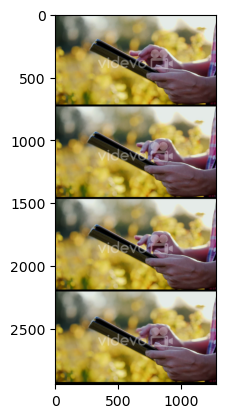

In [10]:
plt.imshow(np.concatenate([post_process(img0[0]), post_process(img1[0]), post_process(img_mid_actual[0]), post_process(img_mid_pred[0])]))

In [11]:
model.update(torch.cat([img0, img1], dim=1), img_mid_actual)

TypeError: IFNet.forward() got an unexpected keyword argument 'scale'